<a href="https://colab.research.google.com/github/Vileno-C/image_reconstruction/blob/main/skimage_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io
from skimage.transform import radon, iradon, resize
from numpy.linalg import norm

# Carregar imagem

In [6]:
# Lista de imagens disponíveis
print(dir(data), end="\n\n")

['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'data_dir', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'palisades_of_vogt', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']



In [7]:
# ----------------------------
# Gerar "imagem verdadeira"
# ----------------------------
n = 128
image = data.shepp_logan_phantom()
image = resize(image, (n, n), mode="reflect", anti_aliasing=True)

# ----------------------------
# Gerar projeções (sinograma)
# ----------------------------
angles = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=angles, circle=False)
b = sinogram.ravel()

# Operadores

In [8]:
# ----------------------------
# Definir operador direto A e A^T
# ----------------------------
def A(x):
    """Aplica a transformada de Radon (projeções)."""
    x = x.reshape((n, n))
    return radon(x, theta=angles, circle=False).ravel()

def AT(y):
    """Aplica o operador adjunto (retroprojeção simples)."""
    y = y.reshape((sinogram.shape[0], sinogram.shape[1]))
    return iradon(y, theta=angles, filter_name=None, circle=False, output_size=n).ravel()

# Metodos

In [10]:
# ----------------------------
# Gradiente descendente
# ----------------------------

#def gradiente(A, AT, b, x0 = None, Lambda=None, iters=100):

x = np.zeros(n*n)       # chute inicial (imagem em vetor)
alpha = 1e-4            # passo do gradiente
n_iter = 200

errors = []

for k in range(n_iter):
    grad = AT(A(x) - b)  # gradiente de ||Ax - b||^2
    x -= alpha * grad
    errors.append(norm(A(x)-b))

reconstruction = x.reshape((n, n))

KeyboardInterrupt: 

In [ ]:
# ----------------------------
# Gradiente descendente
# ----------------------------
x = np.zeros(n*n)       # chute inicial (imagem em vetor)
alpha = 1e-4            # passo do gradiente
n_iter = 200

errors = []

for k in range(n_iter):
    grad = AT(A(x) - b)  # gradiente de ||Ax - b||^2
    x -= alpha * grad
    errors.append(norm(A(x)-b))

reconstruction = x.reshape((n, n))

#teste

# Plotar Resultados

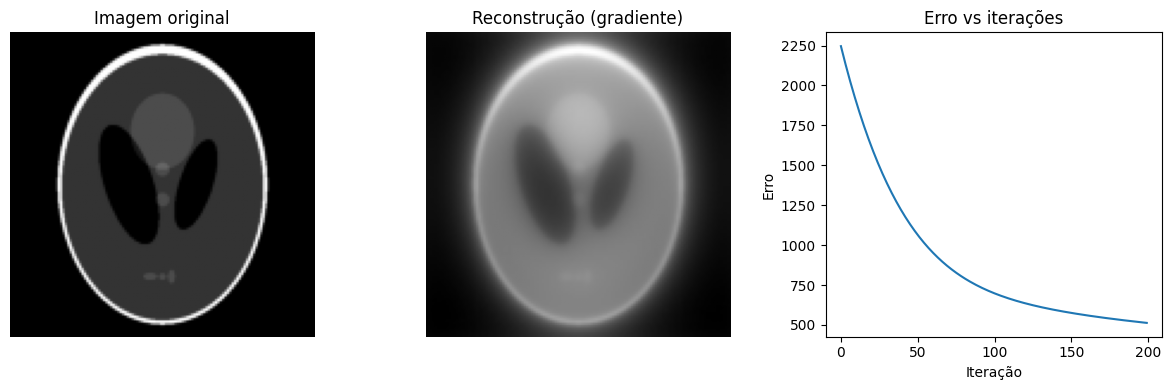

In [ ]:
# ----------------------------
# Visualização
# ----------------------------
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Imagem original")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Reconstrução (gradiente)")
plt.imshow(reconstruction, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Erro vs iterações")
plt.plot(errors)
plt.xlabel("Iteração")
plt.ylabel("Erro")
plt.tight_layout()
plt.show()

['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'data_dir', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'palisades_of_vogt', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']



/tmp/ipython-input-3261332717.py:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(imagem_teste)


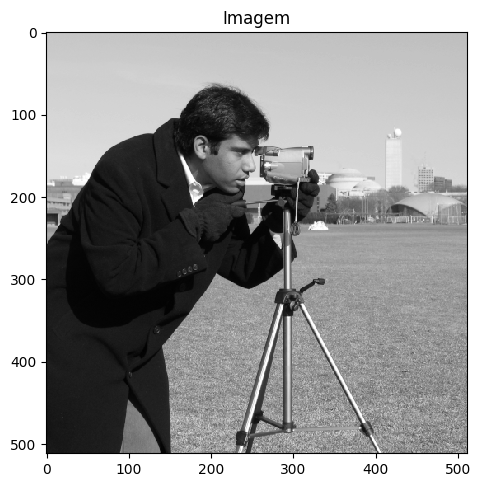

In [ ]:
# Carregar uma imagem de teste
imagem_teste = data.camera()
io.imshow(imagem_teste)
plt.title("Imagem")
plt.show()